In [1]:
from src.models.linreg import LinReg
from src.output.output import summary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats




## Simple Linear Regression

In [2]:
"""Create our initial Dataset"""

x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)
data = pd.DataFrame()
data = data.assign(outcome=y, independent=x)

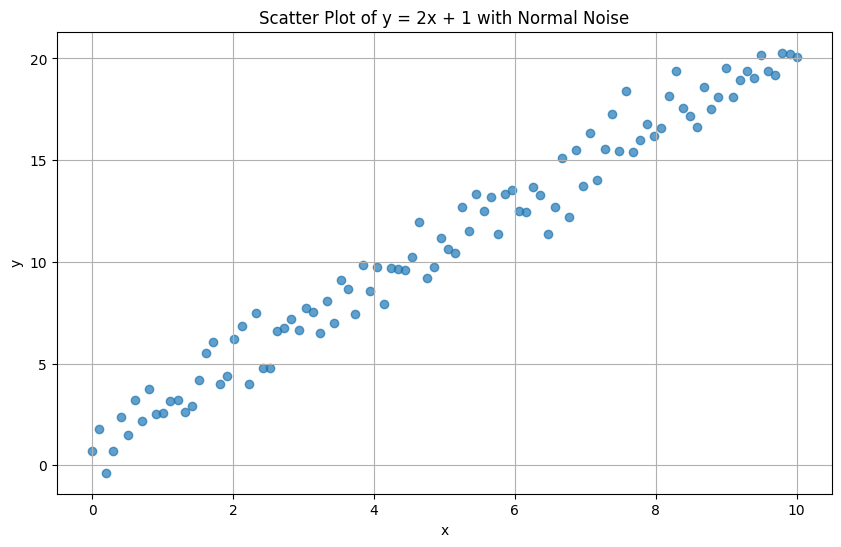

In [3]:
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.title("Scatter Plot of y = 2x + 1 with Normal Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [4]:
"""Create our Linear Regression Model"""

model = LinReg(df=data, 
               outcome="outcome", 
               independent=["independent"])

fitted = model.fitted_values()
data = data.assign(fitted=fitted)



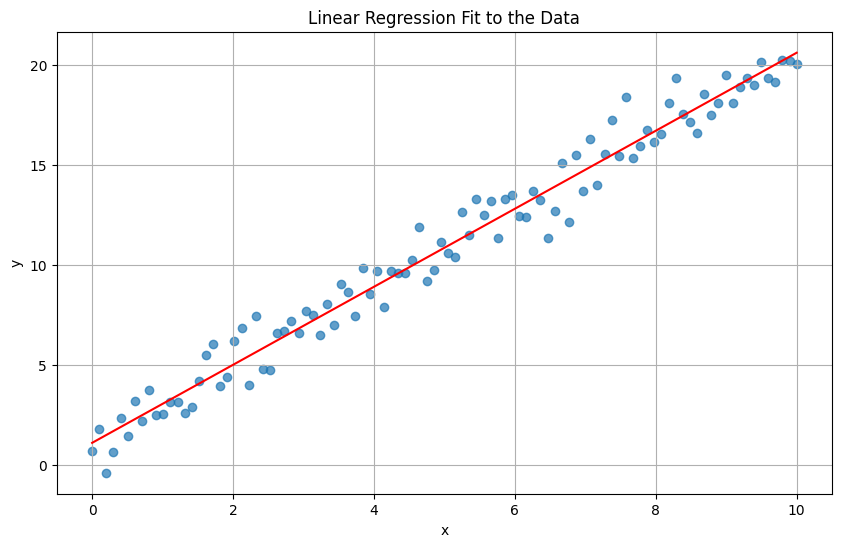

In [5]:
"""Plot the data with the fitted values"""
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.plot(data['independent'], data['fitted'], color='red', label='Fitted Line')
plt.title("Linear Regression Fit to the Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
model.summary()

In [7]:
model.summary(content_type='static')